# MLE and MAP
Let $f_\theta(x)$ be a polynomial regression model as in the previous Homework, and let the `poly_regression_small.csv` from Virtuale be the training set. Then, sample 20% of the data in the `poly_regression_large.csv` dataset to use as test set.

* For a given value of $K$, write three Python functions computing $\theta_{MLE}$, i.e. the optimal parameters obtained by optimizing the MLE-related loss function with Gaussian assumption on the likelihood $p_\theta(y | x)$, by Gradient Descent, Stochastic Gradient Descent (with a `batch_size` = 5), and Normal Equations method with Cholesky Decomposition.
* Compare the performance of the three regression model computed above. In particular, if $(X_{test}, Y_{test})$ is the test set from the `poly_regression_large.csv` dataset, for each of the model, compute:

  $$
  Err = \frac{1}{N_{test}} \sum_{i=1}^{N_{test}} (f_\theta(x^i) - y^i)^2,
  $$

  where $N_{test}$ is the number of elements in the test set, $(x^i, y^i)$ are the input and output elements in the test set. Comment the performance of the three models. 
* For different values of $K$, plot the training datapoints and the test datapoints with different colors and visualize (as a continuous line) the three learned regression model $f_\theta(x)$. Comment the results.
* For increasing values of $K$, compute the training and test error as discussed above. Plot the two errors with respect to $K$. Comment the results.
* Repeat the same experiments by considering the MAP formulation with Gaussian assumption on the prior term $p(\theta)$. Set $K = 8$ and test different values of $\lambda > 0$ in the experiments. Comment the results, comparing:
  - the three optimization method used to obtain $\theta_{MAP}$ (i.e. GD, SGD and Normal Equations),
  - the different values of $\lambda > 0$ tested,
  - the results obtained by $\theta_{MLE}$ vs $\theta_{MAP}$.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the datasets
data_large = pd.read_csv("data/poly_regression_large.csv")
data_small = pd.read_csv("data/poly_regression_small.csv")

# Split the large dataset into training and test sets
X_large = data_large['x'].values
Y_large = data_large['y'].values
X_train_large, X_test_large, Y_train_large, Y_test_large = train_test_split(X_large, Y_large, test_size=0.2, random_state=42)

# Use the full small dataset
X_small = data_small['x'].values
Y_small = data_small['y'].values

In [3]:
def polynomial_features(X, degree):
    return np.vstack([X**i for i in range(degree + 1)]).T

def predict(X, theta):
    return X @ theta

## MLE fuunction

In [5]:
def gradient_descent_mle(X, Y, degree, alpha=0.01, n_epochs=100):
    X_poly = polynomial_features(X, degree)
    theta = np.zeros(X_poly.shape[1])
    
    for epoch in range(n_epochs):
        grad = 2 * X_poly.T @ (predict(X_poly, theta) - Y) / len(Y)
        theta -= alpha * grad
    
    return theta

## SGD for MLE

In [6]:
def stochastic_gradient_descent_mle(X, Y, degree, alpha=0.01, batch_size=5, n_epochs=100):
    X_poly = polynomial_features(X, degree)
    theta = np.zeros(X_poly.shape[1])
    n = len(Y)
    
    for epoch in range(n_epochs):
        indices = np.random.permutation(n)
        X_poly_shuffled = X_poly[indices]
        Y_shuffled = Y[indices]
        
        for i in range(0, n, batch_size):
            X_batch = X_poly_shuffled[i:i+batch_size]
            Y_batch = Y_shuffled[i:i+batch_size]
            grad = 2 * X_batch.T @ (predict(X_batch, theta) - Y_batch) / len(Y_batch)
            theta -= alpha * grad
    
    return theta

## Cholesky Decomp.

In [7]:
def normal_equations_mle(X, Y, degree):
    X_poly = polynomial_features(X, degree)
    A = X_poly.T @ X_poly
    b = X_poly.T @ Y
    L = np.linalg.cholesky(A)
    y = np.linalg.solve(L, b)
    theta = np.linalg.solve(L.T, y)
    return theta

## Training and evaluation

In [8]:
# Train the models
degree = 5
alpha = 0.01
n_epochs = 100

# MLE using GD
theta_gd_mle = gradient_descent_mle(X_small, Y_small, degree, alpha, n_epochs)

# MLE using SGD
theta_sgd_mle = stochastic_gradient_descent_mle(X_small, Y_small, degree, alpha, batch_size=5, n_epochs=n_epochs)

# MLE using Normal Equations
theta_ne_mle = normal_equations_mle(X_small, Y_small, degree)

# Evaluate the models
def compute_error(X, Y, theta):
    X_poly = polynomial_features(X, degree)
    predictions = predict(X_poly, theta)
    return np.mean((predictions - Y)**2)

error_gd_mle = compute_error(X_test_large, Y_test_large, theta_gd_mle)
error_sgd_mle = compute_error(X_test_large, Y_test_large, theta_sgd_mle)
error_ne_mle = compute_error(X_test_large, Y_test_large, theta_ne_mle)

print(f"GD MLE Error: {error_gd_mle}")
print(f"SGD MLE Error: {error_sgd_mle}")
print(f"Normal Equations MLE Error: {error_ne_mle}")

GD MLE Error: 0.08568333986262396
SGD MLE Error: 0.04732179634964913
Normal Equations MLE Error: 0.009688437090322721


## Degree of poly

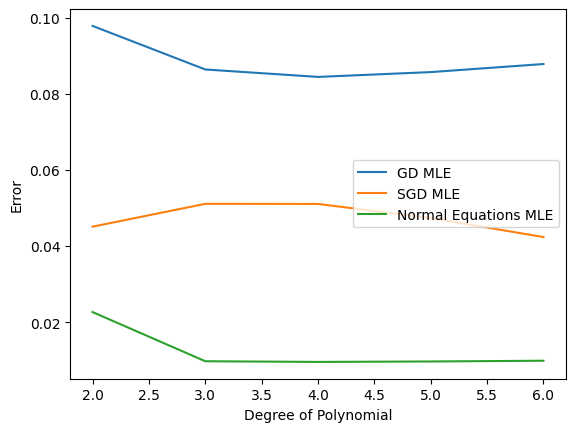

In [9]:
degrees = [2, 3, 4, 5, 6]
errors_gd_mle = []
errors_sgd_mle = []
errors_ne_mle = []

for degree in degrees:
    theta_gd_mle = gradient_descent_mle(X_small, Y_small, degree, alpha, n_epochs)
    theta_sgd_mle = stochastic_gradient_descent_mle(X_small, Y_small, degree, alpha, batch_size=5, n_epochs=n_epochs)
    theta_ne_mle = normal_equations_mle(X_small, Y_small, degree)
    
    error_gd_mle = compute_error(X_test_large, Y_test_large, theta_gd_mle)
    error_sgd_mle = compute_error(X_test_large, Y_test_large, theta_sgd_mle)
    error_ne_mle = compute_error(X_test_large, Y_test_large, theta_ne_mle)
    
    errors_gd_mle.append(error_gd_mle)
    errors_sgd_mle.append(error_sgd_mle)
    errors_ne_mle.append(error_ne_mle)

plt.plot(degrees, errors_gd_mle, label='GD MLE')
plt.plot(degrees, errors_sgd_mle, label='SGD MLE')
plt.plot(degrees, errors_ne_mle, label='Normal Equations MLE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Error')
plt.legend()
plt.show()

## MAP GD

In [10]:
def gradient_descent_map(X, Y, degree, alpha=0.01, n_epochs=100, lam=0.1):
    X_poly = polynomial_features(X, degree)
    theta = np.zeros(X_poly.shape[1])
    
    for epoch in range(n_epochs):
        grad = 2 * X_poly.T @ (predict(X_poly, theta) - Y) / len(Y) + 2 * lam * theta
        theta -= alpha * grad
    
    return theta

## MAP SGD

In [11]:
def stochastic_gradient_descent_map(X, Y, degree, alpha=0.01, batch_size=5, n_epochs=100, lam=0.1):
    X_poly = polynomial_features(X, degree)
    theta = np.zeros(X_poly.shape[1])
    n = len(Y)
    
    for epoch in range(n_epochs):
        indices = np.random.permutation(n)
        X_poly_shuffled = X_poly[indices]
        Y_shuffled = Y[indices]
        
        for i in range(0, n, batch_size):
            X_batch = X_poly_shuffled[i:i+batch_size]
            Y_batch = Y_shuffled[i:i+batch_size]
            grad = 2 * X_batch.T @ (predict(X_batch, theta) - Y_batch) / len(Y_batch) + 2 * lam * theta
            theta -= alpha * grad
    
    return theta

## Cholesky MAP

In [12]:
def normal_equations_map(X, Y, degree, lam=0.1):
    X_poly = polynomial_features(X, degree)
    A = X_poly.T @ X_poly + lam * np.eye(X_poly.shape[1])
    b = X_poly.T @ Y
    L = np.linalg.cholesky(A)
    y = np.linalg.solve(L, b)
    theta = np.linalg.solve(L.T, y)
    return theta

## Training and evaluation MAP 

In [21]:
# Train the models
degree = 8
alpha = 0.01
n_epochs = 100
lam = 0.1

# MAP using GD
theta_gd_map = gradient_descent_map(X_small, Y_small, degree, alpha, n_epochs, lam)

# MAP using SGD
theta_sgd_map = stochastic_gradient_descent_map(X_small, Y_small, degree, alpha, batch_size=5, n_epochs=n_epochs, lam=lam)

# MAP using Normal Equations
theta_ne_map = normal_equations_map(X_small, Y_small, degree, lam)

# Evaluate the models
error_gd_map = compute_error(X_test_large, Y_test_large, theta_gd_map)
error_sgd_map = compute_error(X_test_large, Y_test_large, theta_sgd_map)
error_ne_map = compute_error(X_test_large, Y_test_large, theta_ne_map)

print(f"GD MAP Error: {error_gd_map}")
print(f"SGD MAP Error: {error_sgd_map}")
print(f"Normal Equations MAP Error: {error_ne_map}")


GD MAP Error: 0.09688678862630869
SGD MAP Error: 0.0663024008392044
Normal Equations MAP Error: 0.009882456859841078


## Comparing MLE and MAP

GD MLE Error: 0.08780399690863173
SGD MLE Error: 0.042362572022621524
Normal Equations MLE Error: 0.009883827655860478
GD MAP Error: 0.09688678862630869
SGD MAP Error: 0.0663024008392044
Normal Equations MAP Error: 0.009882456859841078


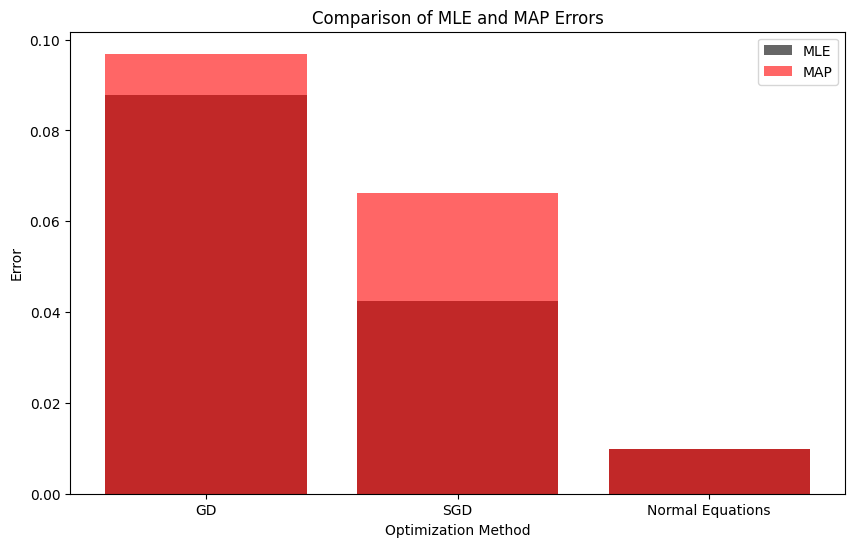

In [23]:
print(f"GD MLE Error: {error_gd_mle}")
print(f"SGD MLE Error: {error_sgd_mle}")
print(f"Normal Equations MLE Error: {error_ne_mle}")

print(f"GD MAP Error: {error_gd_map}")
print(f"SGD MAP Error: {error_sgd_map}")
print(f"Normal Equations MAP Error: {error_ne_map}")
# Plot the errors
errors_mle = [error_gd_mle, error_sgd_mle, error_ne_mle]
errors_map = [error_gd_map, error_sgd_map, error_ne_map]
methods = ['GD', 'SGD', 'Normal Equations']

plt.figure(figsize=(10, 6))
plt.bar(methods, errors_mle, alpha=0.6, label='MLE', color='black')
plt.bar(methods, errors_map, alpha=0.6, label='MAP', color='red')
plt.xlabel('Optimization Method')
plt.ylabel('Error')
plt.title('Comparison of MLE and MAP Errors')
plt.legend()
plt.show()

## Varying $\lambda$

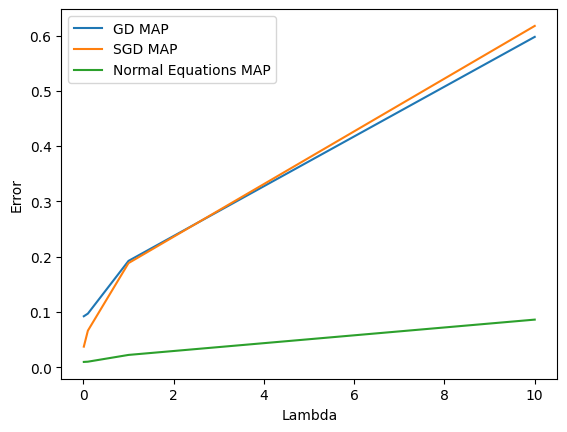

In [17]:
lambdas = [0.01, 0.1, 1, 10]
errors_gd_map = []
errors_sgd_map = []
errors_ne_map = []

for lam in lambdas:
    theta_gd_map = gradient_descent_map(X_small, Y_small, degree, alpha, n_epochs, lam)
    theta_sgd_map = stochastic_gradient_descent_map(X_small, Y_small, degree, alpha, batch_size=5, n_epochs=n_epochs, lam=lam)
    theta_ne_map = normal_equations_map(X_small, Y_small, degree, lam)
    
    error_gd_map = compute_error(X_test_large, Y_test_large, theta_gd_map)
    error_sgd_map = compute_error(X_test_large, Y_test_large, theta_sgd_map)
    error_ne_map = compute_error(X_test_large, Y_test_large, theta_ne_map)
    
    errors_gd_map.append(error_gd_map)
    errors_sgd_map.append(error_sgd_map)
    errors_ne_map.append(error_ne_map)

plt.plot(lambdas, errors_gd_map, label='GD MAP')
plt.plot(lambdas, errors_sgd_map, label='SGD MAP')
plt.plot(lambdas, errors_ne_map, label='Normal Equations MAP')
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.legend()
plt.show()